In [1]:
import mnistutils # custom library

In [2]:
filenames = mnistutils.mnist_download("data")
print(filenames)

{'train_images': 'train-images-idx3-ubyte', 'train_labels': 'train-labels-idx1-ubyte', 'validation_images': 't10k-images-idx3-ubyte', 'validation_labels': 't10k-labels-idx1-ubyte'}


In [2]:
training_data = list(mnistutils.read(dataset="training", path="data"))
print(len(training_data))
testing_data = list(mnistutils.read(dataset="testing", path="data"))
print(len(testing_data))

60000
10000


In [3]:
import numpy as np
import keras

num_classes = 10

# Preparing training and validation data
train_images = []
train_labels = []

for i in range(0, len(training_data)):
    train_images.append(training_data[i][1])
    train_labels.append(training_data[i][0])

# convert list to array
train_images = np.asarray(train_images);
train_labels = np.asarray(train_labels);

# reshaping so we can match model's input size
train_images = train_images.reshape(60000, 784)
train_images = train_images.astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, num_classes)

print(train_images.shape)
print(train_labels.shape)

validation_images = []
validation_labels = []

for i in range(0, len(testing_data)):
    validation_images.append(testing_data[i][1])
    validation_labels.append(testing_data[i][0])

# convert list to array
validation_images = np.asarray(validation_images);
validation_labels = np.asarray(validation_labels);

# reshaping so we can match model's input size
validation_images = validation_images.reshape(10000, 784)
validation_images = validation_images.astype('float32') / 255
validation_labels = keras.utils.to_categorical(validation_labels, num_classes)

print(validation_images.shape)
print(validation_labels.shape)

Using TensorFlow backend.


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [19]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from numpy.random import seed

def get_model(activation_function=None):

    model = Sequential()
    model.add(Dense(512, activation=activation_function, input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    return model


10000/10000 [==============================] - 0s 44us/step


<Figure size 1440x1800 with 0 Axes>

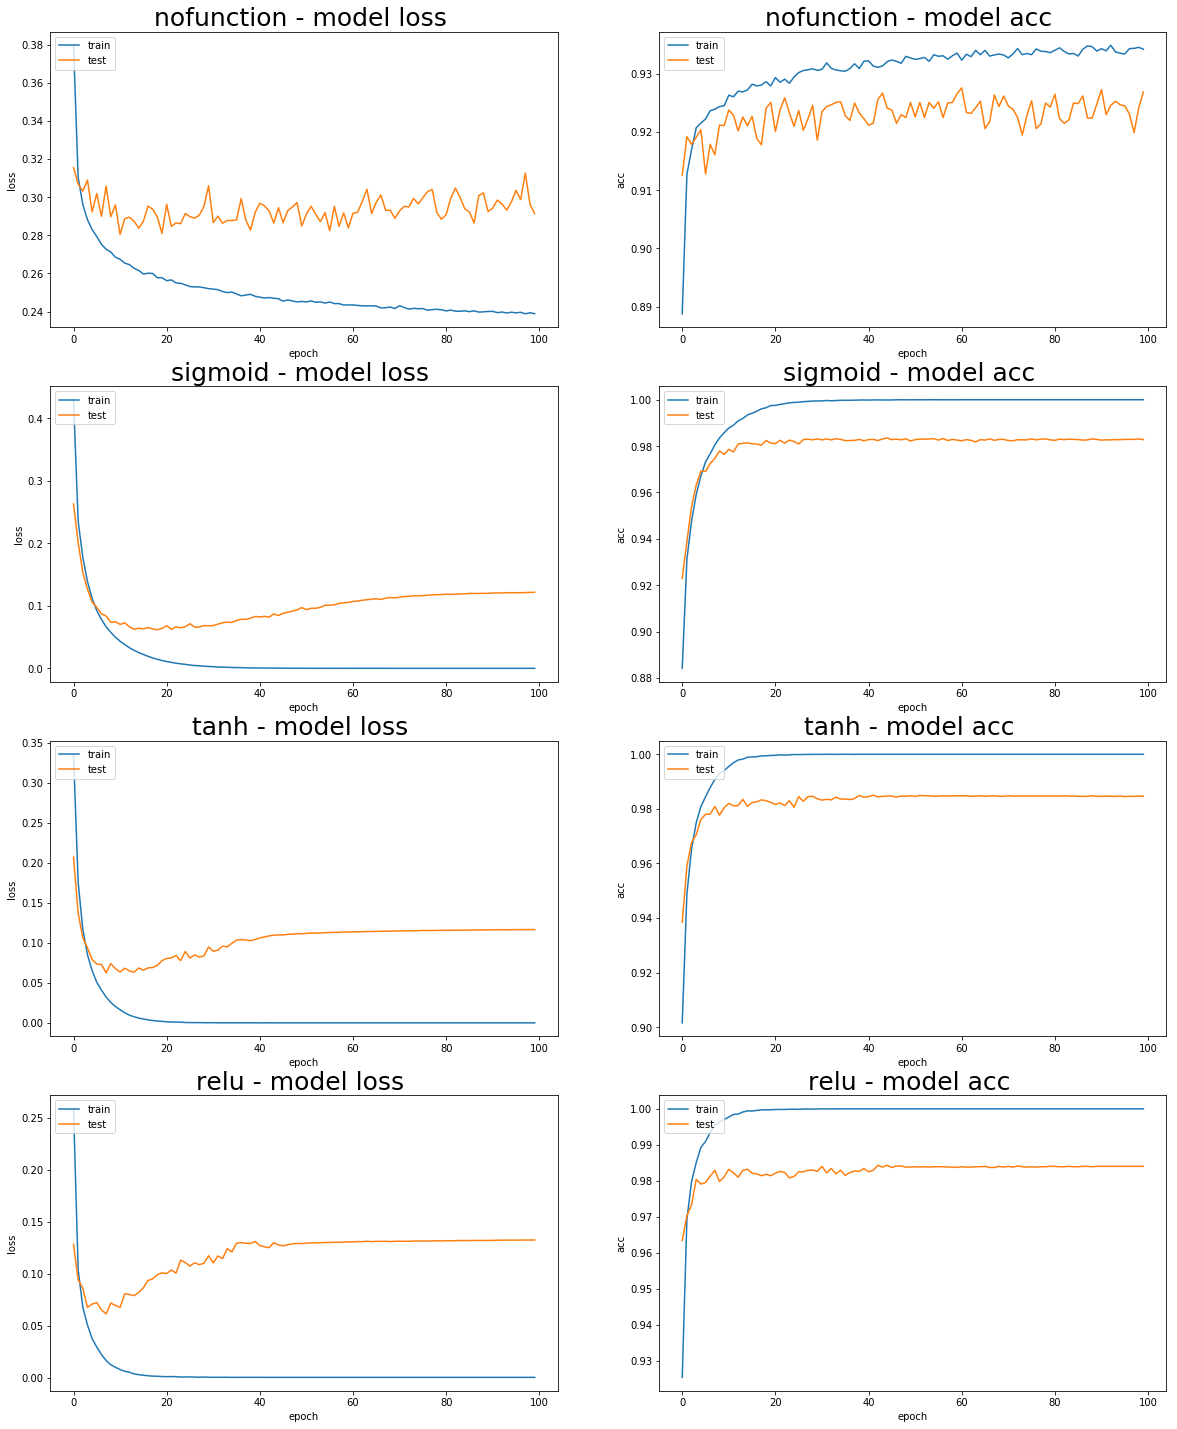

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# mpl.rcParams['savefig.dpi'] = 80
# mpl.rcParams['figure.dpi'] = 80

plt.rcParams['figure.figsize'] = [20, 25]

models_under_test = {
"nofunction": get_model(),
"sigmoid": get_model(activation_function='sigmoid'),
"tanh": get_model(activation_function='tanh'),
"relu": get_model(activation_function='relu')
}

batch_size = 128
epochs = 100

fig = plt.figure()


fig, axes = plt.subplots(4, 2)
    
counter = 0   

for key in models_under_test:
    model = models_under_test[key]
    
    history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(validation_images, validation_labels)
                   )

    score = model.evaluate(validation_images, validation_labels)

    axes[counter,0].set_title("%s - %s " % (key, "model loss"),  fontsize=25)
    axes[counter,1].set_title("%s - %s " % (key, "model acc"),  fontsize=25)

    axes[counter,0].plot(history.history['loss'])
    axes[counter,0].plot(history.history['val_loss'])
    axes[counter,0].set_ylabel('loss')
    axes[counter,0].set_xlabel('epoch')
    axes[counter,0].legend(['train', 'test'], loc='upper left')

    axes[counter,1].plot(history.history['acc'])
    axes[counter,1].plot(history.history['val_acc'])
    axes[counter,1].set_ylabel('acc')
    axes[counter,1].set_xlabel('epoch')
    axes[counter,1].legend(['train', 'test'], loc='upper left')
    
    counter = counter + 1
